# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset

In [2]:
df = pd.read_csv("Heart-Disease.csv")

In [3]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [4]:
df.shape

(303, 14)

# Feature Engineering

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

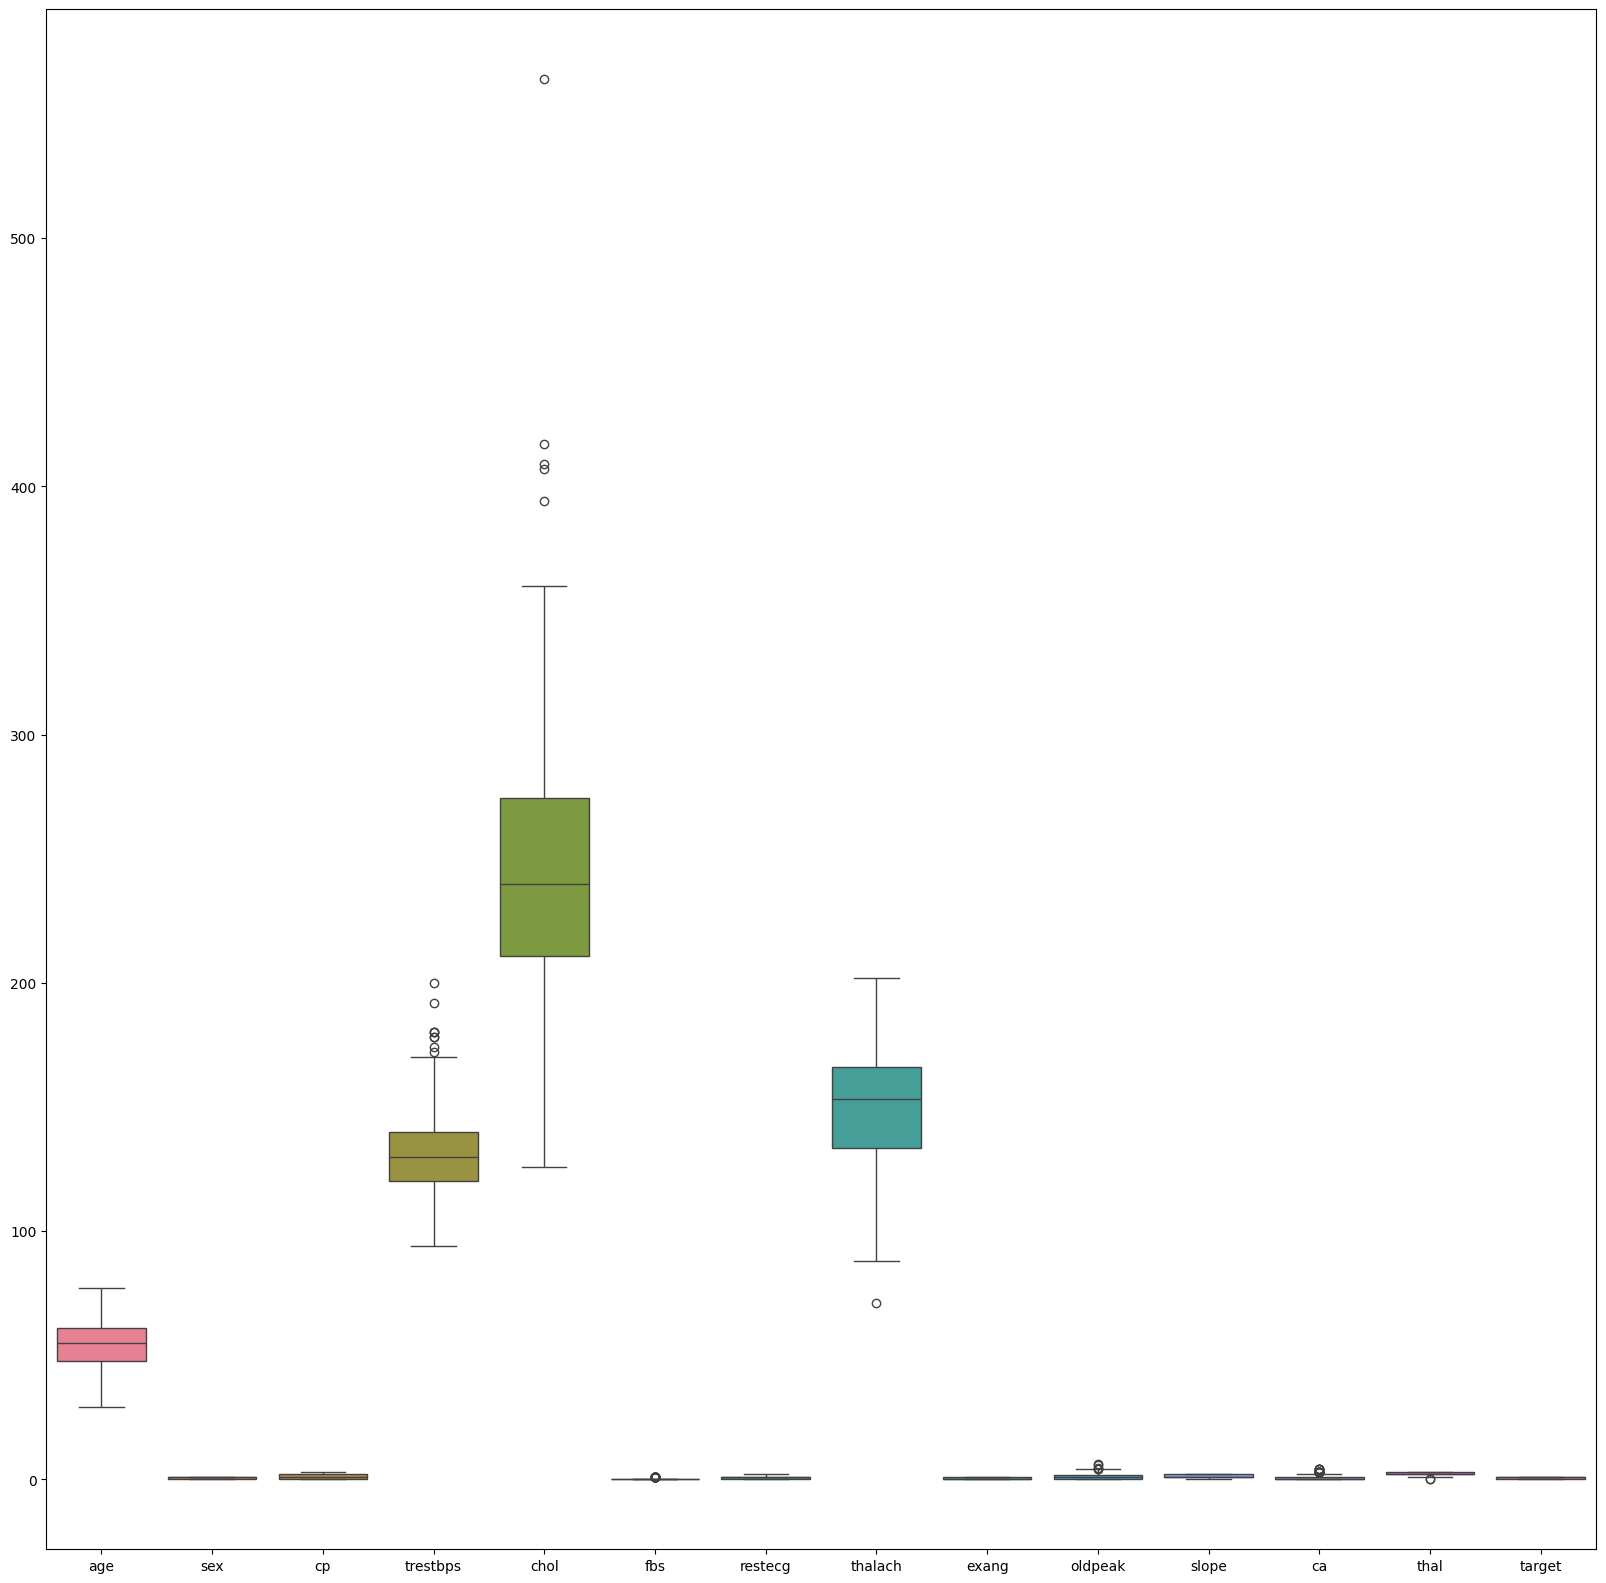

In [6]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

In [7]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [8]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [10]:
df = df[(z < 3).all(axis=1)]
df.shape

(287, 14)

In [11]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

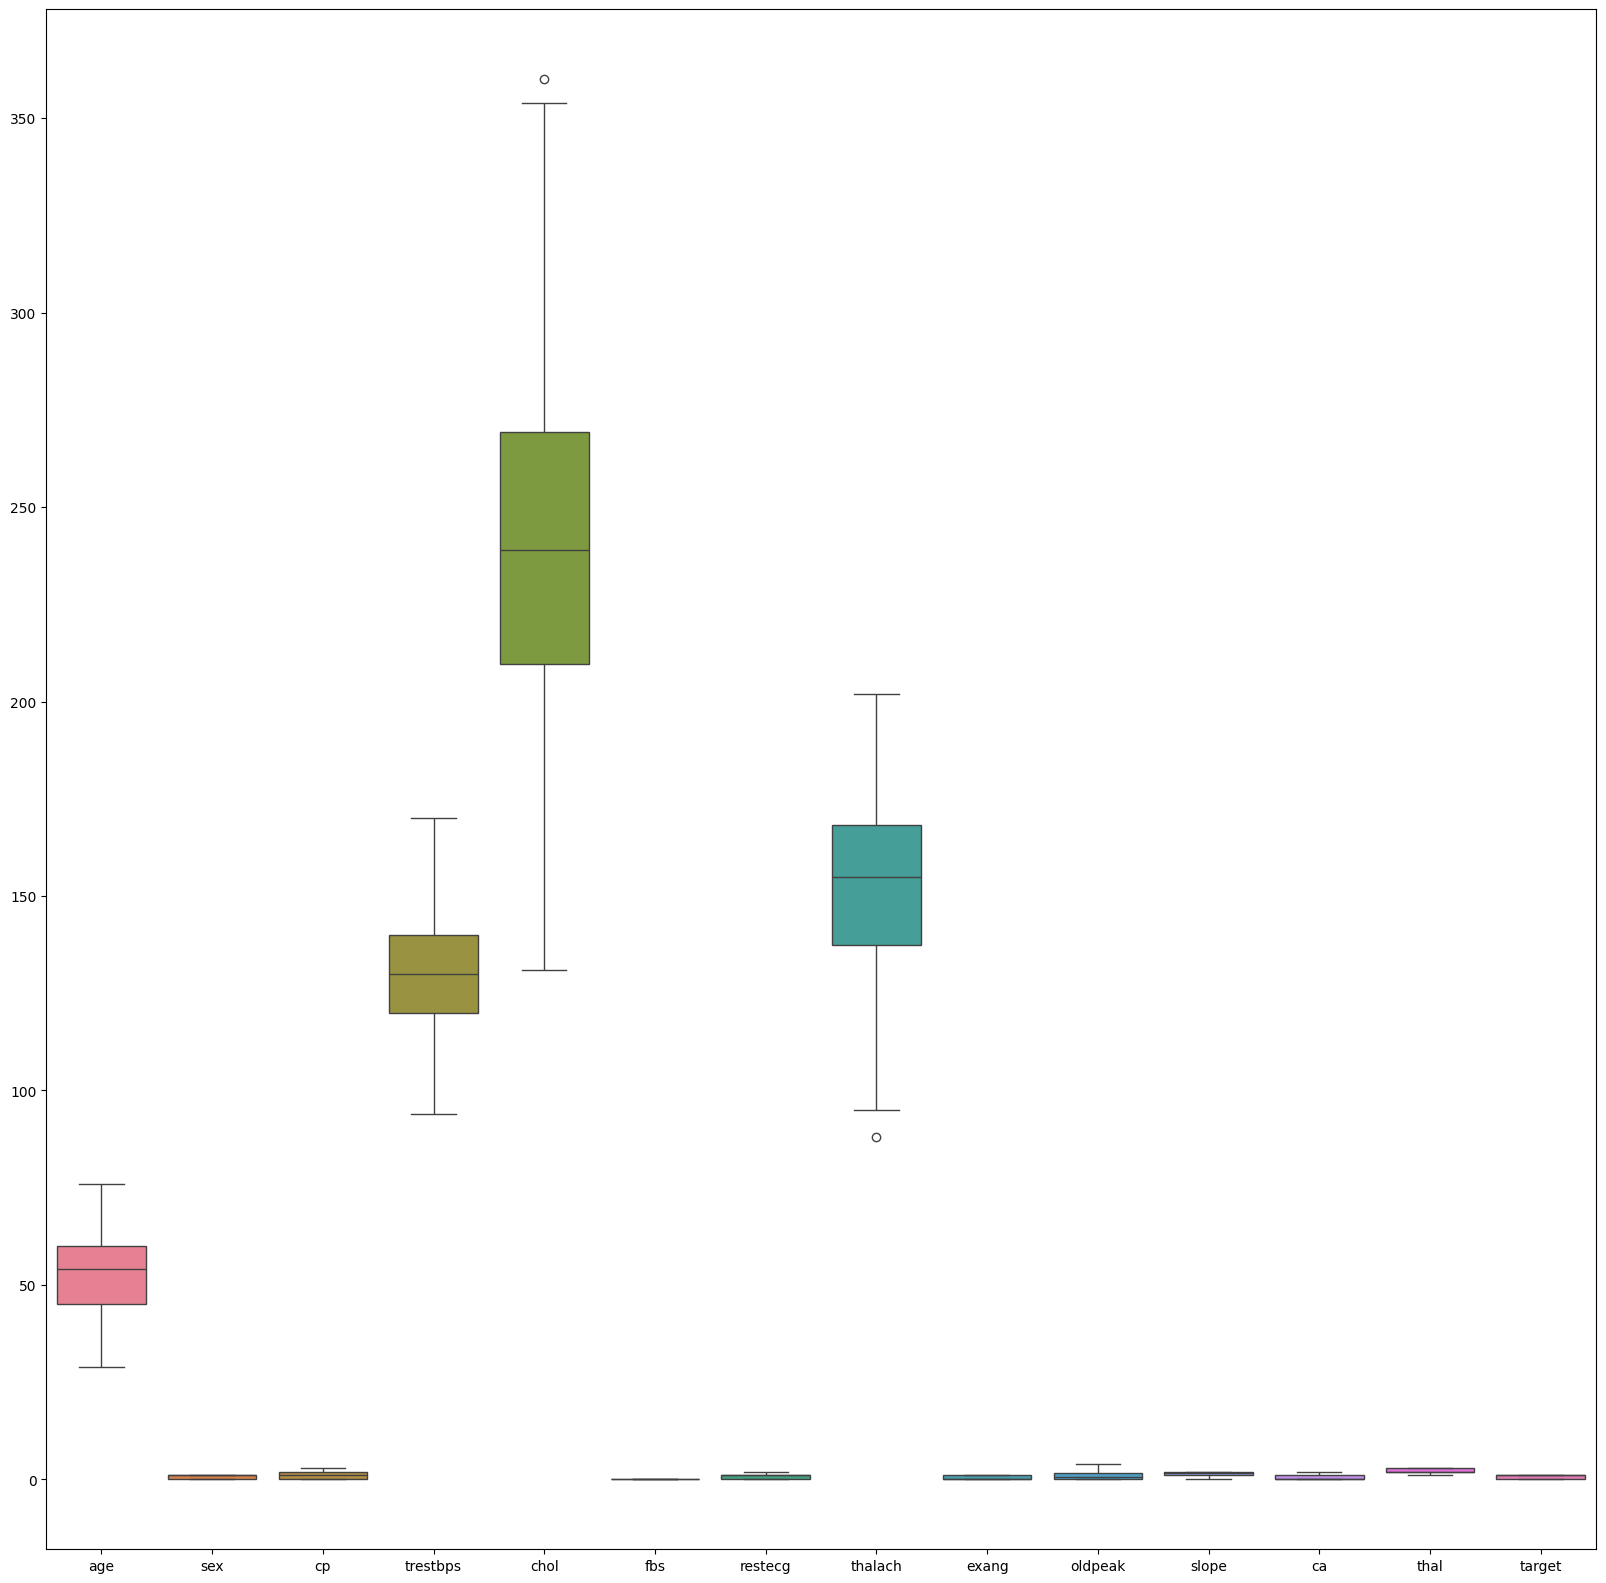

In [12]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

# Feature selection

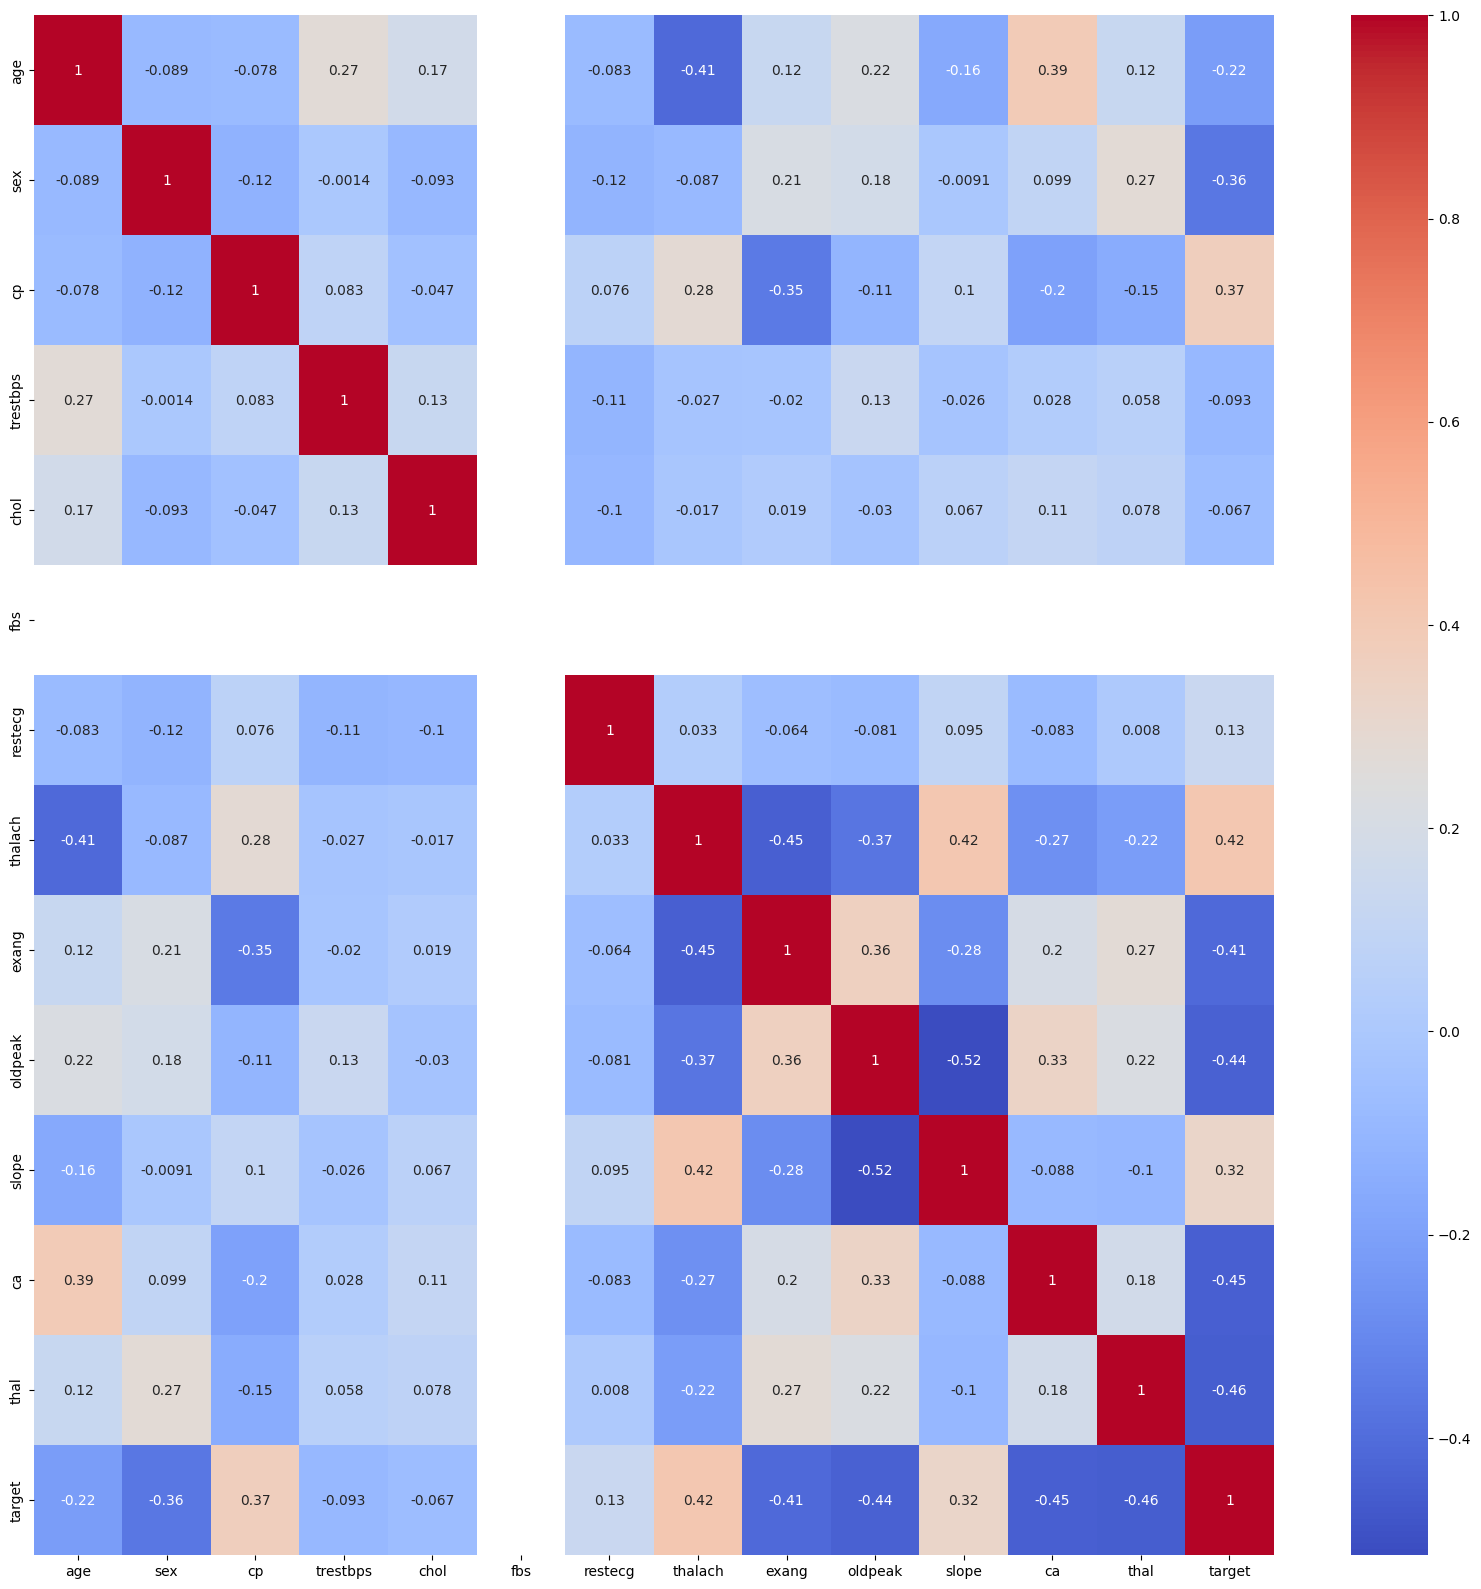

In [13]:
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(),cmap="coolwarm",annot= True)

In [14]:
# df = df.drop(columns= "chol")
# df.head()

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


# Feature scalling

In [16]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [17]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,False,True,False,True,...,False,False,False,True,True,False,False,False,True,False
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,True,False,True,False,...,True,False,False,True,True,False,False,False,True,False
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False


In [18]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,True,False,True,False,...,True,False,True,False,True,False,False,False,False,True
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False


In [19]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000
mean,-2.337312e-16,-7.401487e-16,-1.012835e-16,-6.232831e-17,6.232831e-17,0.578947
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000


# Visualisation

In [20]:
#sns.pairplot(df , hue="target", height=3, aspect=1);

# Model selection

In [21]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1) 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)  


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## K-Nearest Neighbor Classifier

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9130434782608695

In [26]:
score.mean()

0.8014619883040934

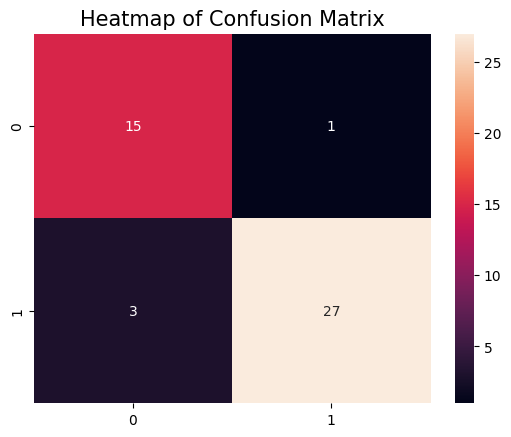

In [27]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [28]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
KNN = accuracy_score(y_test, y_pred_knn)
KNN

0.9782608695652174

In [29]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8289473684210528

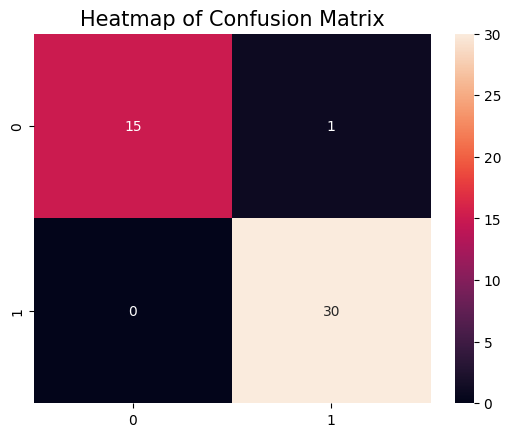

In [30]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [31]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        30

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.98        46
weighted avg       0.98      0.98      0.98        46



In [32]:
from sklearn.metrics import log_loss
import numpy as np


# Calculate log loss
loss = log_loss(y_test, y_pred_knn)

print("Log Loss:", loss)

Log Loss: 0.7835576823721122


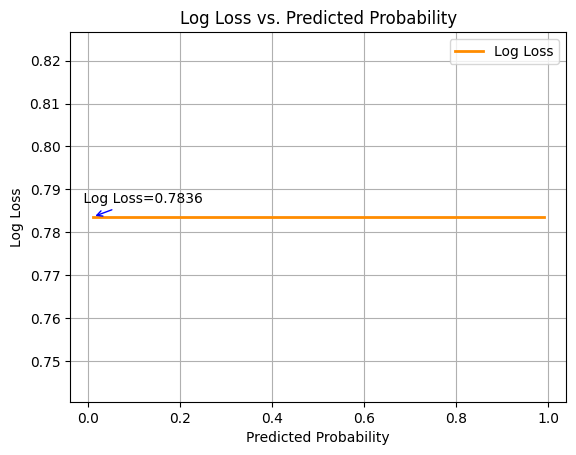

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Generate a range of predicted probabilities (0 to 1)
probs = np.linspace(0.01, 0.99, 100)

# Compute log loss for each probability
log_losses = []
for p in probs:
    # Assuming true labels are all 1's, generate dummy predicted probabilities
    y_pred = y_pred_knn  
    y_true = y_test  

    # Compute log loss and append to the list
    loss = log_loss(y_true, y_pred)
    log_losses.append(loss)

# Plot log loss 
plt.plot(probs, log_losses, color='darkorange', lw=2, label='Log Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Predicted Probability')

# Find the maximum log loss value and its corresponding index
max_loss = np.max(log_losses)
max_loss_index = np.argmax(log_losses)

# Annotate the maximum log loss value on the graph
plt.annotate(f' Log Loss={max_loss:.4f}', xy=(probs[max_loss_index], log_losses[max_loss_index]),
             xytext=(-10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='blue'))

plt.grid(True)
plt.legend()
plt.show()


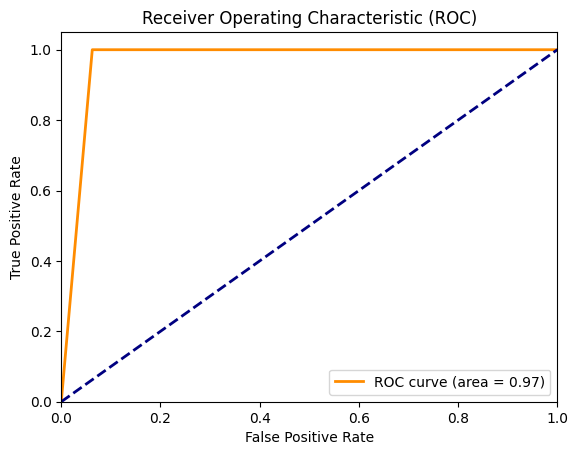

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20,criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
RFC=accuracy_score(y_test, y_pred_rf)
RFC

0.8695652173913043

In [36]:
score=cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()

0.7906432748538011

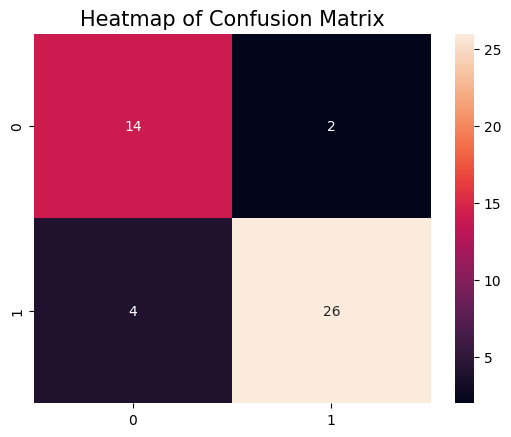

In [37]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [38]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.93      0.87      0.90        30

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46



In [39]:
# Calculate log loss
loss = log_loss(y_test, y_pred_rf)

print("Log Loss:", loss)

Log Loss: 4.7013460942326715


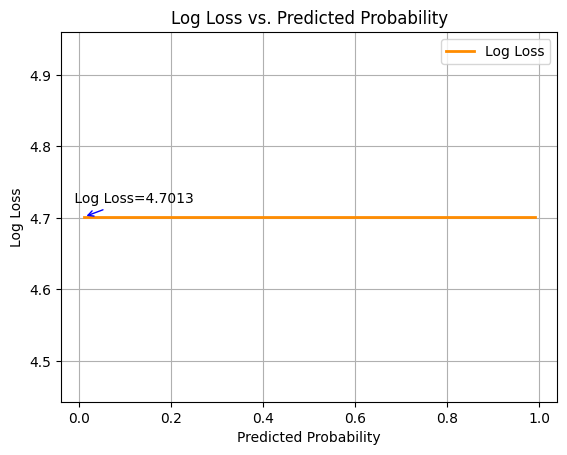

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Generate a range of predicted probabilities (0 to 1)
probs = np.linspace(0.01, 0.99, 100)

# Compute log loss for each probability
log_losses = []
for p in probs:
    # Assuming true labels are all 1's, generate dummy predicted probabilities
    y_pred = y_pred_rf  
    y_true = y_test  

    # Compute log loss and append to the list
    loss = log_loss(y_true, y_pred)
    log_losses.append(loss)

# Plot log loss 
plt.plot(probs, log_losses, color='darkorange', lw=2, label='Log Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Predicted Probability')

# Find the maximum log loss value and its corresponding index
max_loss = np.max(log_losses)
max_loss_index = np.argmax(log_losses)

# Annotate the maximum log loss value on the graph
plt.annotate(f' Log Loss={max_loss:.4f}', xy=(probs[max_loss_index], log_losses[max_loss_index]),
             xytext=(-10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='blue'))

plt.grid(True)
plt.legend()
plt.show()

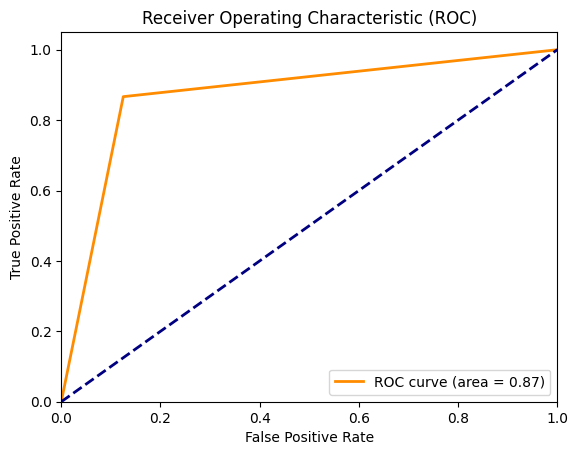

In [41]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

###  XGBoost Classifier

In [42]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
XGB = accuracy_score(y_test, y_pred_xgb)
XGB

0.8695652173913043

In [43]:
score=cross_val_score(xgb_classifier,X_train,y_train,cv=10)
score.mean()

0.8070175438596492

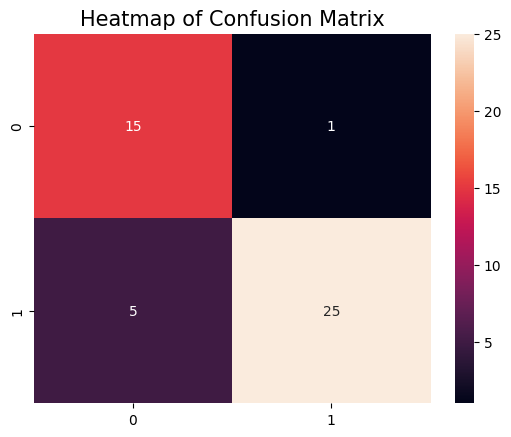

In [44]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [45]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.96      0.83      0.89        30

    accuracy                           0.87        46
   macro avg       0.86      0.89      0.86        46
weighted avg       0.89      0.87      0.87        46



In [46]:
# Calculate log loss
loss = log_loss(y_test, y_pred_xgb)

print("Log Loss:", loss)

Log Loss: 4.7013460942326715


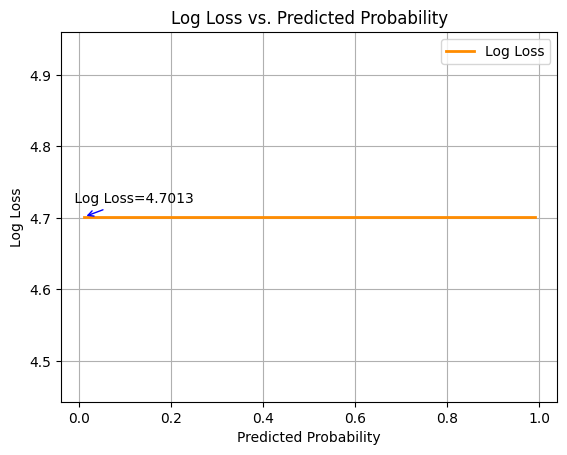

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Generate a range of predicted probabilities (0 to 1)
probs = np.linspace(0.01, 0.99, 100)

# Compute log loss for each probability
log_losses = []
for p in probs:
    # Assuming true labels are all 1's, generate dummy predicted probabilities
    y_pred = y_pred_xgb 
    y_true = y_test  

    # Compute log loss and append to the list
    loss = log_loss(y_true, y_pred)
    log_losses.append(loss)

# Plot log loss 
plt.plot(probs, log_losses, color='darkorange', lw=2, label='Log Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Predicted Probability')

# Find the maximum log loss value and its corresponding index
max_loss = np.max(log_losses)
max_loss_index = np.argmax(log_losses)

# Annotate the maximum log loss value on the graph
plt.annotate(f' Log Loss={max_loss:.4f}', xy=(probs[max_loss_index], log_losses[max_loss_index]),
             xytext=(-10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='blue'))

plt.grid(True)
plt.legend()
plt.show()

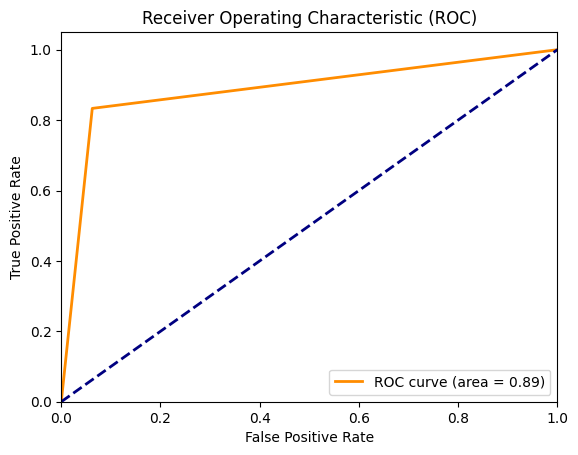

In [48]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## AdaBoost with Random Forest

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier
(n_estimators=100), n_estimators=100)
ada_clf.fit(X_train, y_train)
y_pred_adb = ada_clf.predict(X_test)
ADB = accuracy_score(y_test, y_pred_adb)
ADB

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9130434782608695

In [50]:
score=cross_val_score(ada_clf,X_train,y_train,cv=10)
score.mean()

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this 

0.7906432748538011

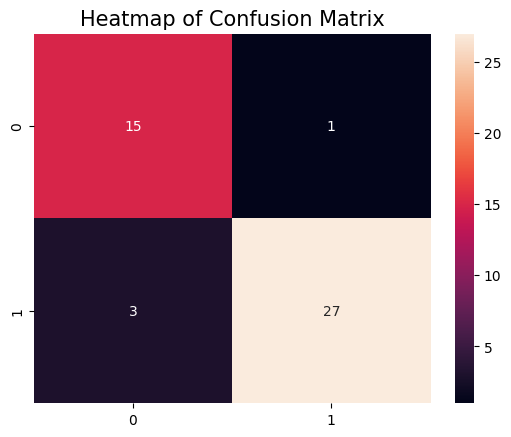

In [51]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_adb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [52]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.96      0.90      0.93        30

    accuracy                           0.91        46
   macro avg       0.90      0.92      0.91        46
weighted avg       0.92      0.91      0.91        46



In [53]:
# Calculate log loss
loss = log_loss(y_test, y_pred_adb)

print("Log Loss:", loss)

Log Loss: 3.134230729488448


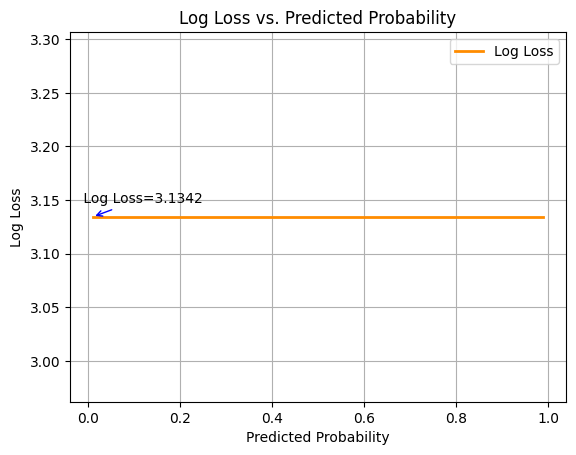

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Generate a range of predicted probabilities (0 to 1)
probs = np.linspace(0.01, 0.99, 100)

# Compute log loss for each probability
log_losses = []
for p in probs:
    # Assuming true labels are all 1's, generate dummy predicted probabilities
    y_pred = y_pred_adb 
    y_true = y_test  

    # Compute log loss and append to the list
    loss = log_loss(y_true, y_pred)
    log_losses.append(loss)

# Plot log loss 
plt.plot(probs, log_losses, color='darkorange', lw=2, label='Log Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Predicted Probability')

# Find the maximum log loss value and its corresponding index
max_loss = np.max(log_losses)
max_loss_index = np.argmax(log_losses)

# Annotate the maximum log loss value on the graph
plt.annotate(f' Log Loss={max_loss:.4f}', xy=(probs[max_loss_index], log_losses[max_loss_index]),
             xytext=(-10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='blue'))

plt.grid(True)
plt.legend()
plt.show()

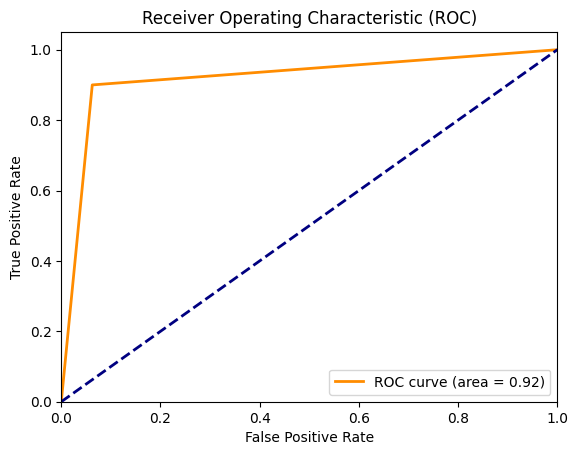

In [55]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_adb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)
y_pred_gbc = gbc_clf.predict(X_test)
GBC = accuracy_score(y_test, y_pred_adb)
GBC

0.9130434782608695

In [58]:
score=cross_val_score(gbc_clf,X_train,y_train,cv=10)
score.mean()

0.7853801169590643

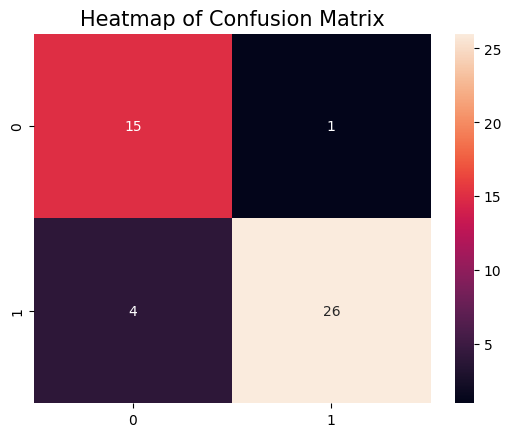

In [59]:
#confustion metrix of  Gradient Boosting classifier
cm = confusion_matrix(y_test, y_pred_gbc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [60]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.96      0.87      0.91        30

    accuracy                           0.89        46
   macro avg       0.88      0.90      0.88        46
weighted avg       0.90      0.89      0.89        46



In [61]:
# Calculate log loss
loss = log_loss(y_test, y_pred_gbc)

print("Log Loss:", loss)

Log Loss: 3.9177884118605597


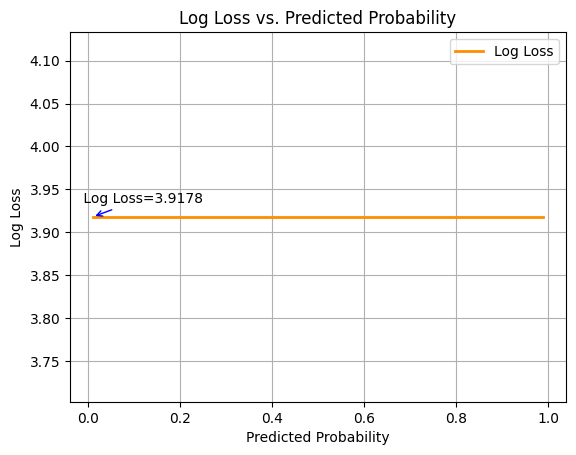

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Generate a range of predicted probabilities (0 to 1)
probs = np.linspace(0.01, 0.99, 100)

# Compute log loss for each probability
log_losses = []
for p in probs:
    # Assuming true labels are all 1's, generate dummy predicted probabilities
    y_pred = y_pred_gbc  
    y_true = y_test  

    # Compute log loss and append to the list
    loss = log_loss(y_true, y_pred)
    log_losses.append(loss)

# Plot log loss 
plt.plot(probs, log_losses, color='darkorange', lw=2, label='Log Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Predicted Probability')

# Find the maximum log loss value and its corresponding index
max_loss = np.max(log_losses)
max_loss_index = np.argmax(log_losses)

# Annotate the maximum log loss value on the graph
plt.annotate(f' Log Loss={max_loss:.4f}', xy=(probs[max_loss_index], log_losses[max_loss_index]),
             xytext=(-10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='blue'))

plt.grid(True)
plt.legend()
plt.show()

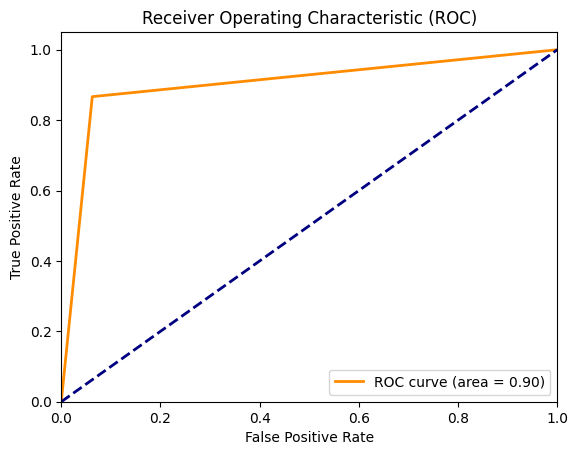

In [63]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_gbc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Model save

In [64]:
## Pickle
from xgboost import XGBClassifier
import pickle

# save model
pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[15  1]
 [ 0 30]] 

Accuracy of K – Nearest Neighbor  model =  0.9782608695652174


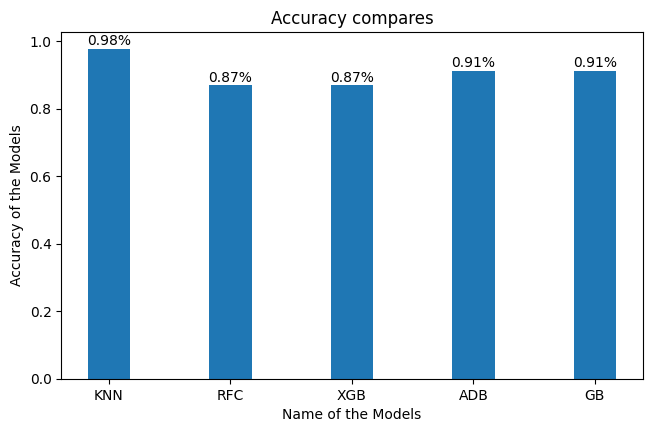

In [65]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.50, 4.50]
#plt.rcParams["figure.autolayout"] = True

x = ['KNN','RFC','XGB','ADB','GB']
y = [KNN,RFC,XGB,ADB,GBC]

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.01,
      s="{0:.2f}%".format(height),
      ha='center')
plt.title('Accuracy compares')
plt.xlabel("Name of the Models")
plt.ylabel("Accuracy of the Models")
plt.show()